In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/content/pima_diabetes.csv')
df = df.drop(0, axis=0)

In [5]:
# Convert relevant columns to numeric, coercing errors to NaN
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 1. Basic Information
print("Dataset Info:")
print(df.info())  # Check data types and missing values
print("\nSummary Statistics:")
print(df.describe())  # Summary stats for numerical features


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 1 to 1059
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1059 non-null   int64  
 1   Glucose                   1059 non-null   int64  
 2   BloodPressure             1059 non-null   int64  
 3   SkinThickness             1059 non-null   int64  
 4   Insulin                   1059 non-null   int64  
 5   BMI                       1059 non-null   float64
 6   DiabetesPedigreeFunction  1059 non-null   float64
 7   Age                       1059 non-null   int64  
 8   Outcome                   1059 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 74.6 KB
None

Summary Statistics:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1059.000000  1059.000000    1059.000000    1059.000000  1059.000000   
mean      3.953730   121.866856      70.27

In [6]:
# 2. Check for Missing Values (explicit NaNs and invalid zeros)
print("\nMissing Values (NaNs):")
print(df.isnull().sum())
print("\nInvalid Zeros (for features where 0 is invalid):")
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"{col}: {len(df[df[col] == 0])} zeros")


Missing Values (NaNs):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Invalid Zeros (for features where 0 is invalid):
Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 269 zeros
Insulin: 462 zeros
BMI: 11 zeros



Class Distribution (Outcome):
Outcome
0    0.632672
1    0.367328
Name: proportion, dtype: float64


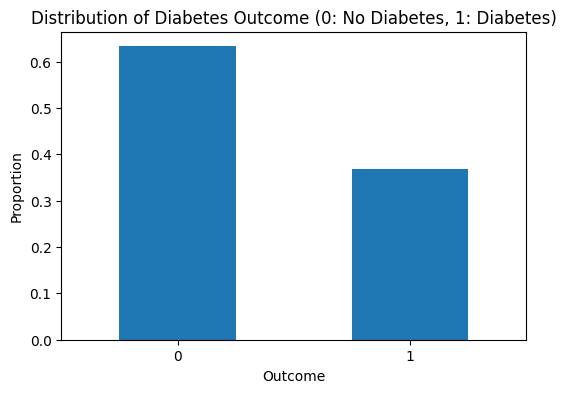

In [8]:
# 3. Class Distribution
print("\nClass Distribution (Outcome):")
outcome_counts = df['Outcome'].value_counts(normalize=True)
print(outcome_counts)  # Proportion of 0 (no diabetes) vs 1 (diabetes)

plt.figure(figsize=(6, 4))
outcome_counts.plot(kind='bar')
plt.title('Distribution of Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

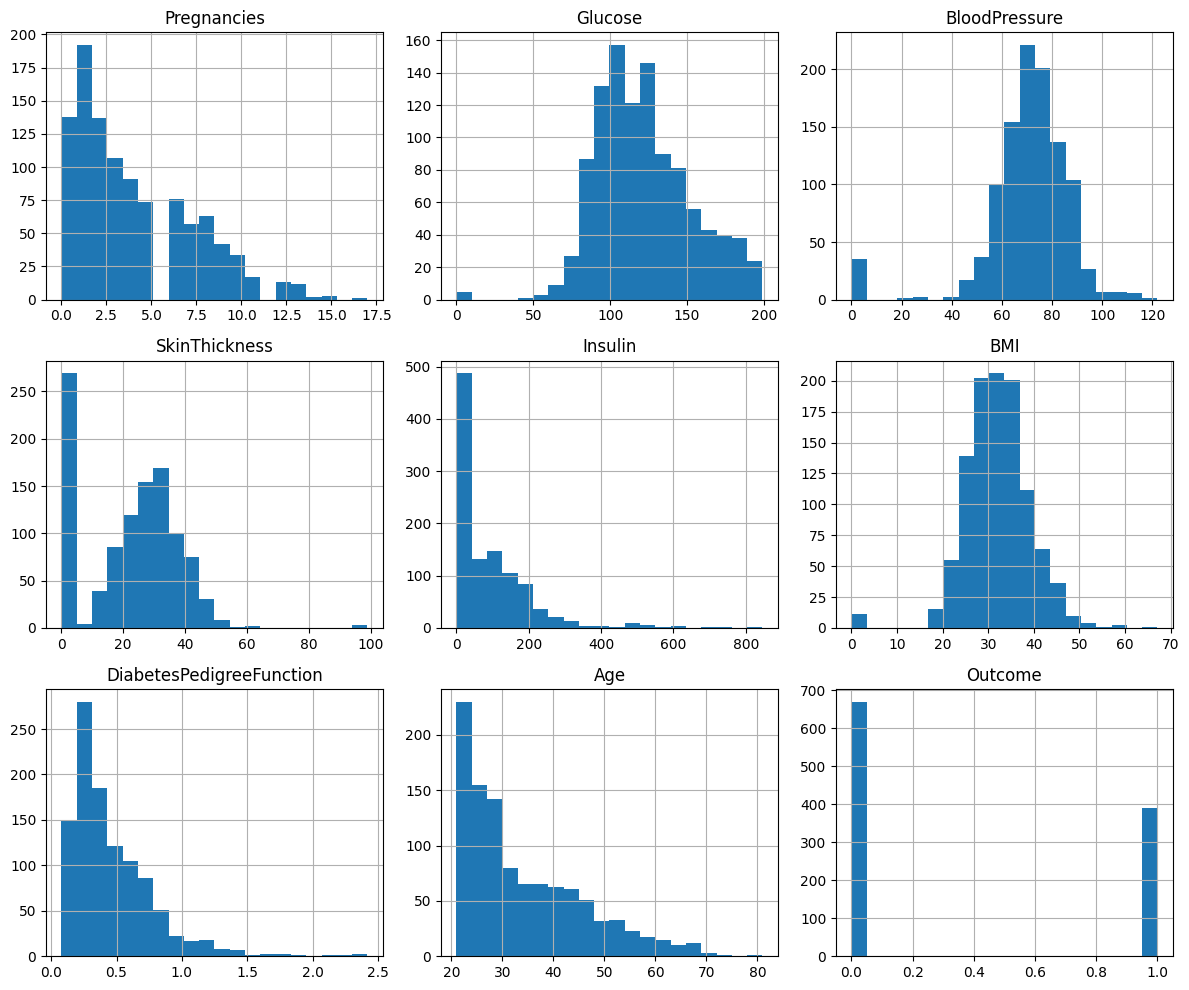

In [9]:
# 4. Visualizations
# Histogram of all features
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

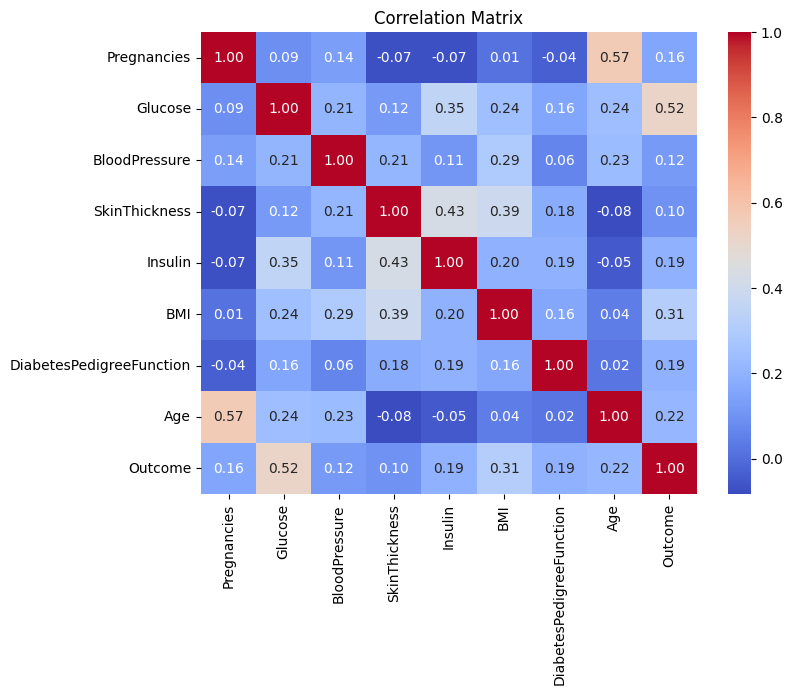

In [10]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

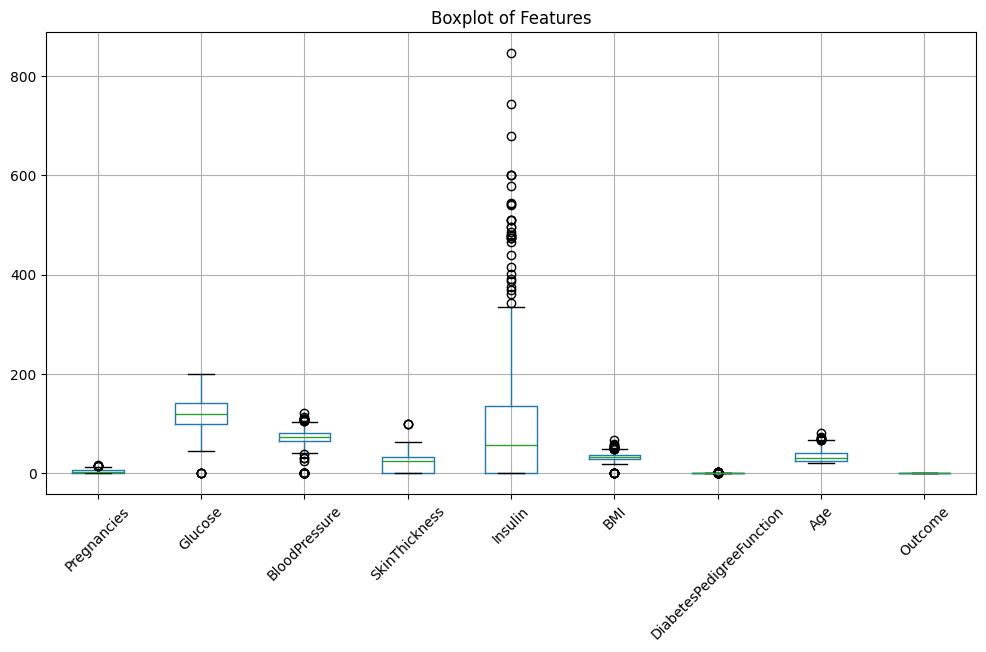

In [11]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

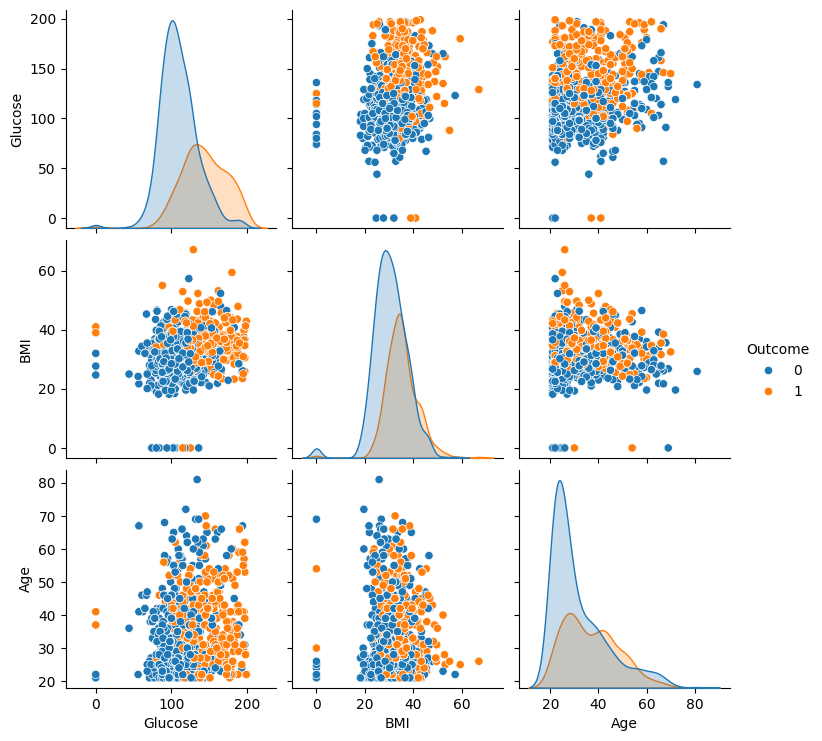

In [12]:
# Pairplot for feature relationships (subset for clarity)
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 1: Preprocessing
# Replace invalid zeros with median for relevant features
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = df[col][df[col] != 0].median()  # Compute median excluding zeros
    df[col] = df[col].replace(0, median_value)

In [15]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#Classification
#Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

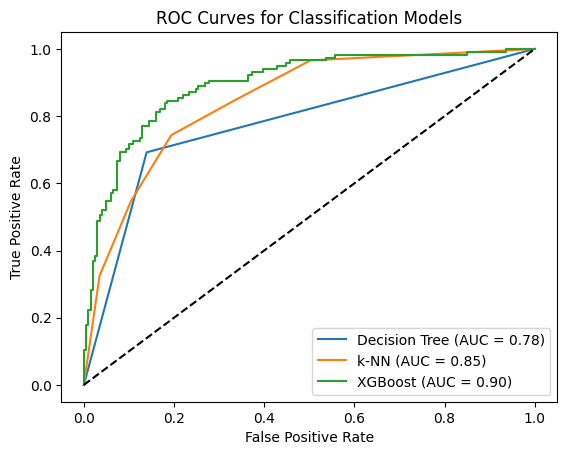

In [18]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    # ROC Curve
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.show()


Classification Results:

Decision Tree:
Accuracy: 0.7987
Precision: 0.7431
Recall: 0.6923
F1-Score: 0.7168

k-NN:
Accuracy: 0.7830
Precision: 0.6905
Recall: 0.7436
F1-Score: 0.7160

XGBoost:
Accuracy: 0.8302
Precision: 0.7692
Recall: 0.7692
F1-Score: 0.7692


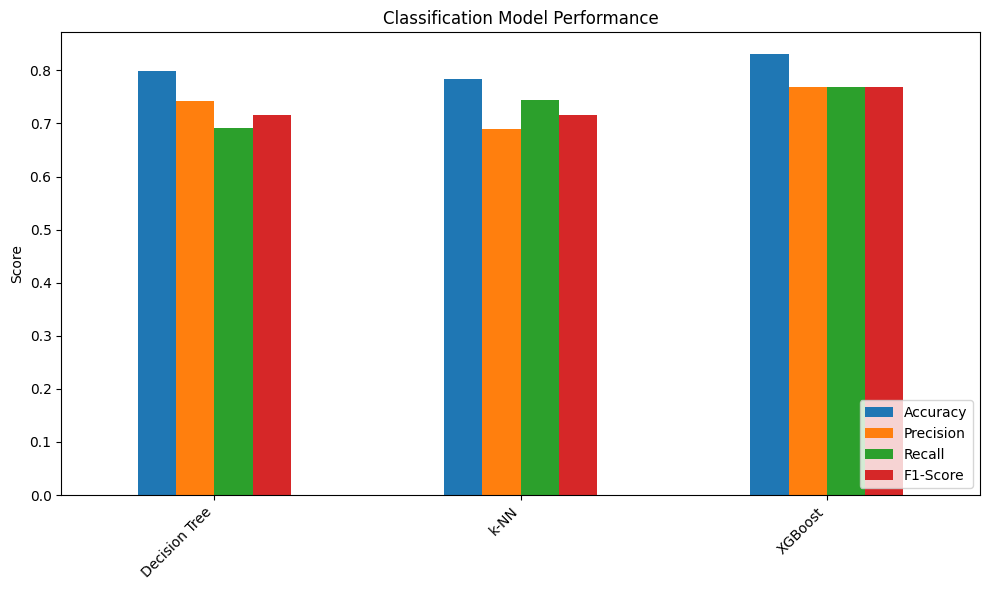

In [20]:
#Printing classification results
print("\nClassification Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

#Visualizing classification results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

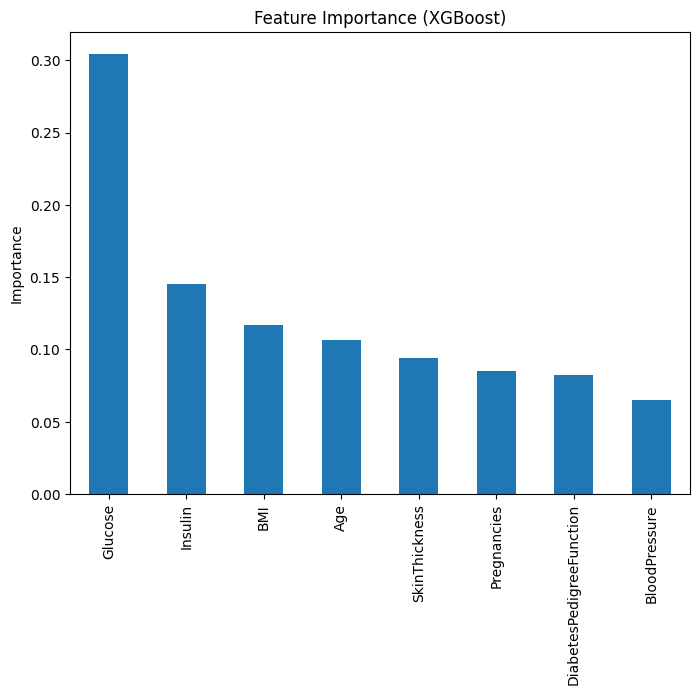

In [21]:
#Feature Importance (for XGBoost)
xgb_model = models['XGBoost']
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))
plt.title('Feature Importance (XGBoost)')
plt.ylabel('Importance')
plt.show()

**CLUSTERING**

In [24]:
#Clustering
#Applying k-means (k=2 for high/low risk)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)
silhouette = silhouette_score(X_train_scaled, clusters)
print(f"K-Means Silhouette Score: {silhouette:.4f}")

K-Means Silhouette Score: 0.2026


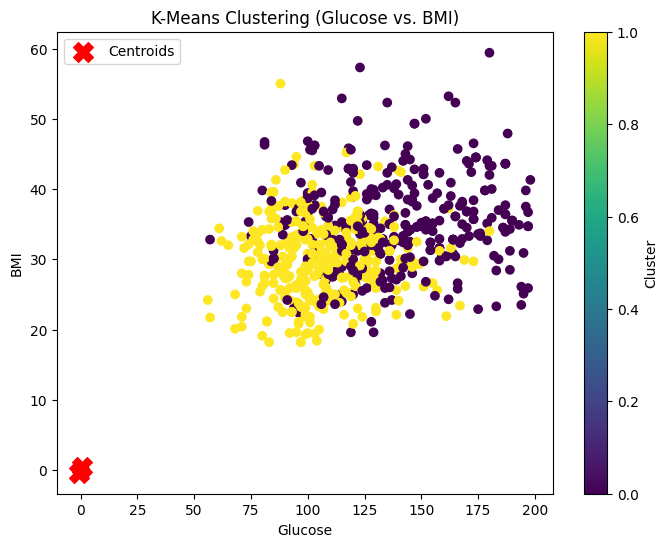

In [25]:
#Visualizing clusters (using Glucose and BMI for 2D plot)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train['Glucose'], X_train['BMI'], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, X.columns.get_loc('Glucose')],
            kmeans.cluster_centers_[:, X.columns.get_loc('BMI')],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-Means Clustering (Glucose vs. BMI)')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

In [28]:
#Cluster Interpretation
#Add clusters to training data
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = clusters
print("\nCluster Summary Statistics:")
print(X_train_clustered.groupby('Cluster').mean())


Cluster Summary Statistics:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           5.676301  137.962428      79.309249      33.046243  164.381503   
1           2.516456  106.848101      66.584810      25.587342  112.301266   

               BMI  DiabetesPedigreeFunction        Age  
Cluster                                                  
0        35.165318                  0.519974  41.329480  
1        29.955949                  0.420691  27.582278  


In [29]:
#Compare clusters with Outcome
cluster_outcome = pd.crosstab(X_train_clustered['Cluster'], y_train)
print("\nCluster vs. Outcome Distribution:")
print(cluster_outcome)


Cluster vs. Outcome Distribution:
Outcome    0    1
Cluster          
0        141  205
1        328   67


In [30]:
import joblib

# Save scaler, XGBoost model, and k-means model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(models['XGBoost'], 'xgb_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
print("Models and scaler saved.")

Models and scaler saved.


# **We can now use our Trained Models and Scalers to make predictions for our new pateint data.**

Below we have shown a prediction for a new patient data.

In [31]:
scaler = joblib.load('scaler.pkl')
xgb_model = joblib.load('xgb_model.pkl')
kmeans = joblib.load('kmeans_model.pkl')  # For clustering

In [32]:
#Example patient Data
new_patient = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [140],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [120],
    'BMI': [32.5],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [35]
})

In [33]:
#Preprocess the new patient data

medians = {}
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    medians[col] = df[col][df[col] != 0].median()

# Replace zeros (if any) with training medians
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    new_patient[col] = new_patient[col].replace(0, medians[col])

In [34]:
#Scaling features using the same scaler
new_patient_scaled = scaler.transform(new_patient)

Predict with **XGBoost**

In [35]:
prediction = xgb_model.predict(new_patient_scaled)[0]
probability = xgb_model.predict_proba(new_patient_scaled)[0][1]

In [36]:
# Interpret prediction
print(f"\nPrediction for new patient:")
print(f"Outcome: {'Diabetic' if prediction == 1 else 'Non-diabetic'}")
print(f"Probability of diabetes: {probability:.2%}")


Prediction for new patient:
Outcome: Diabetic
Probability of diabetes: 99.41%


In [37]:
#Feature importance for interpretability
feature_importance = pd.Series(xgb_model.feature_importances_, index=new_patient.columns)
print("\nFeature Importance (XGBoost):")
print(feature_importance.sort_values(ascending=False))


Feature Importance (XGBoost):
Glucose                     0.304398
Insulin                     0.145350
BMI                         0.116810
Age                         0.106676
SkinThickness               0.094164
Pregnancies                 0.085445
DiabetesPedigreeFunction    0.082226
BloodPressure               0.064931
dtype: float32


In [38]:
#Assigning to k-means cluster
cluster = kmeans.predict(new_patient_scaled)[0]
print(f"\nCluster Assignment: Cluster {cluster}")
print(f"(Cluster 0 typically low-risk, Cluster 1 typically high-risk based on training)")


Cluster Assignment: Cluster 1
(Cluster 0 typically low-risk, Cluster 1 typically high-risk based on training)
